In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram, plot_state_city
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import numpy as np
from math import *

{'1 1 0': 964, '1 0 1': 10, '0 0 0': 10, '1 0 0': 13, '1 1 1': 6, '0 0 1': 7, '0 1 0': 9, '0 1 1': 5}


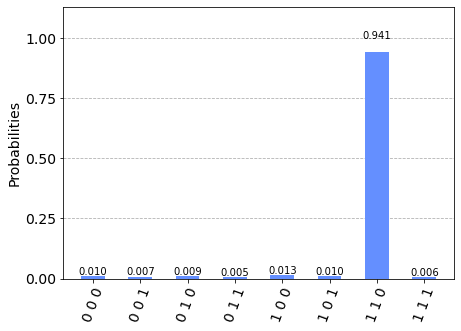

In [2]:
q = QuantumRegister(5)
c0 = ClassicalRegister(1, "c0")
c1 = ClassicalRegister(1, "c1")
c2 = ClassicalRegister(1, "c2")
c3 = ClassicalRegister(1, "c3")
c4 = ClassicalRegister(1, "c4")
qc = QuantumCircuit(q, c0, c1, c2, name="grover3")

# superposição de todos os estados da base
qc.h(q[1])
qc.h(q[2])
qc.h(q[3])

# oracle, f(x)='x1 & x2 & x3, mudança de fase qubit 1
qc.x(q[1]) 
qc.h(q[3]) 
qc.ccx(q[1],q[2],q[3])
qc.h(q[3])
qc.x(q[1]) 

# Grover diffusion Gate
qc.h(q[1]) 
qc.h(q[2])
qc.h(q[3])

qc.x(q[1]) 
qc.x(q[2])
qc.x(q[3])

qc.h(q[3]) 
qc.ccx(q[1],q[2],q[3])
qc.h(q[3])

qc.x(q[1]) 
qc.x(q[2])
qc.x(q[3])

qc.h(q[1]) 
qc.h(q[2])
qc.h(q[3])

# 2x

# oracle, f(x)='x1 & x2 & x3, mudança de fase qubit 1
qc.x(q[1]) 
qc.h(q[3]) 
qc.ccx(q[1],q[2],q[3])
qc.h(q[3])
qc.x(q[1]) 

# Grover diffusion Gate
qc.h(q[1]) 
qc.h(q[2])
qc.h(q[3])

qc.x(q[1]) 
qc.x(q[2])
qc.x(q[3])

qc.h(q[3]) 
qc.ccx(q[1],q[2],q[3])
qc.h(q[3])

qc.x(q[1]) 
qc.x(q[2])
qc.x(q[3])

qc.h(q[1]) 
qc.h(q[2])
qc.h(q[3])

qc.measure(q[1], c0[0])
qc.measure(q[2], c1[0])
qc.measure(q[3], c2[0])

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

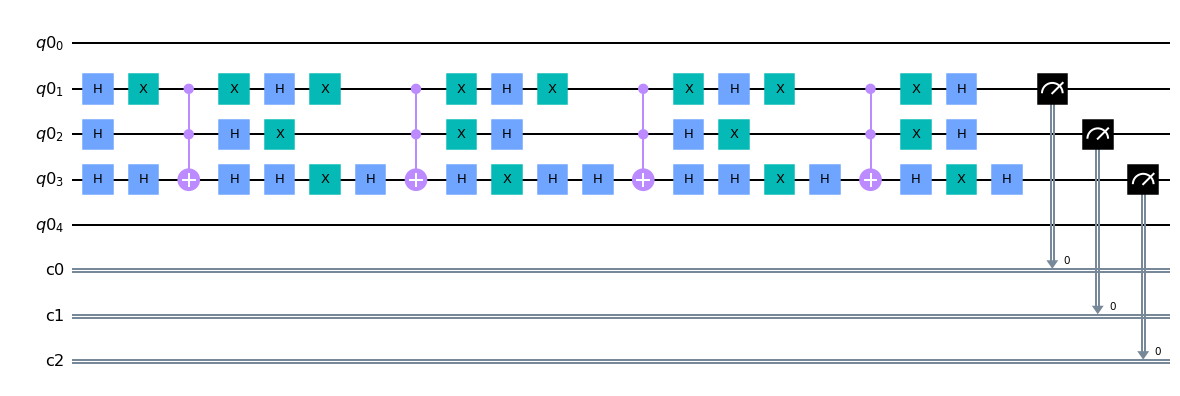

In [3]:
qc.draw(output='mpl')

In [4]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_athens')

job_exp = execute(qc, backend=backend, shots=shots)
job_monitor(job_exp)

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub

In [6]:
result_exp = job_exp.result()
print(result_exp)

Result(backend_name='ibmq_athens', backend_version='1.3.15', qobj_id='63102be4-ebae-4586-8063-371b522e6070', job_id='6071e4da4ee21e7044b00f9a', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 123, '0x1': 63, '0x2': 78, '0x3': 85, '0x4': 164, '0x5': 78, '0x6': 349, '0x7': 84}), header=QobjExperimentHeader(clbit_labels=[['c0', 0], ['c1', 0], ['c2', 0]], creg_sizes=[['c0', 1], ['c1', 1], ['c2', 1]], global_phase=3.926990816987246, memory_slots=3, metadata={}, n_qubits=5, name='grover3', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), memory=False)], date=2021-04-10 14:49:08-03:00, status=Successful completion, status=QobjHeader(backend_name='ibmq_athens', backend_version='1.3.15'), time_taken=7.593001127243042, execution_id='08a98fa8-9a25-11eb-8159-b02628ea1e00', client_version={'qiskit': '0.25.0'})


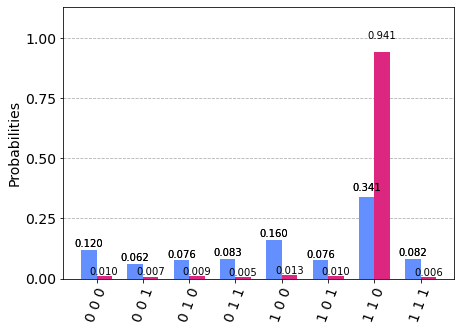

In [7]:
counts_exp = result_exp.get_counts(qc)
plot_histogram([counts_exp,counts])

In [9]:
jobID = job_exp.job_id()
print('JOB ID: {}'.format(jobID))

JOB ID: 6071e1c957095c1e707d8035


In [57]:
#job_get=backend.retrieve_job(jobID)
#job_get.result().get_counts(qc)

In [ ]:
api.get_jobs()